# K-means clustering
## Introduction
K-means is an example of unsupervised learning algorithms that solve clustering problem.
Suppose we have a data set $X=\{ \mathbf{x}_1 \cdots \mathbf{x}_N \}$ consisting of $N$ observations of a random $D$-dimensional Euclidean variable $\mathbf{x}$. Our goal is to partition the data set into some number $K$ of clusters, which comprise the set of centers (centroids), $\mathbf{m}_k=\{\mathbf{\mu}_1 \cdots \mathbf{\mu}_K \}$, where in this case we assume that the value of $K$ is given.

K-means clustering can be solved by EM algorithm which consists of two steps: E-step and M-step.
On each E-step, we find the Euclidean distance between $N$ data points and $K$ cluster centers (centroids), where the most probable cluster for each $\mathbf{x}_n$ can be computed by finding the nearest prototype:
\begin{align}
z_n^*=\text{arg} \, \min\limits_{k} \parallel \mathbf{x}_n - \mathbf{\mu}_k \parallel^2
\end{align}
The M-step updates each cluster center by computing the mean of all points assigned to it:
\begin{align}
\mathbf{\mu}_k=\frac{1}{N_k} \sum_{n:z_n = k} \mathbf{x}_n
\end{align}

The pseudo-code of K-means clustering can be summarised as following:

<table>
  <tr>
    <td>
    Randomly select cluster centers ($\mathbf{m}_k$) as initial centroids; <br/> 
<b>while</b> <i>centroids change</i> <b>do</b>:     
&emsp; <b>E-step</b>: <br/> 
&emsp; Calculate the distance between each data point and cluster center (centroid); <br /> 
&emsp; Assign each data point to its closest cluster center (centroid): $z_n^*=\text{arg} \, \min\limits_{k} \parallel \mathbf{x}_n - \mathbf{\mu}_k \parallel^2$; <br /> 
&emsp; Form K clusters by assigning each point to its closest centroid; <br /> 
<br/> 
&emsp; <b>M-step</b>: <br />
&emsp; Update each cluster center by computing the mean of all points assigned to it: $\mathbf{\mu}_k=\frac{1}{N_k} \sum_{n:z_n = k} \mathbf{x}_n$; <br /> 
<b>end</b> <br /> 
<b>Result</b>: Cluster indices of each data point (assignments)    
  </td>
  </tr>
</table>

## Tutorial 1: Clustering on a simple toy data
In this subsection, we implement K-means to cluster a simple toy data. 
First, we import all necessary libraries.

In [1]:
# We import all necessary libraries
from pyKmeans import Kmeans # This imports the Kmeans function (which we created)
import numpy as np # This imports numerical python (numpy) library
import matplotlib.pyplot as plt # This imports matplotlib library for plotting


//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Then, we create a simple data based on two independent multivariate Gaussian distributions and we plot this data.

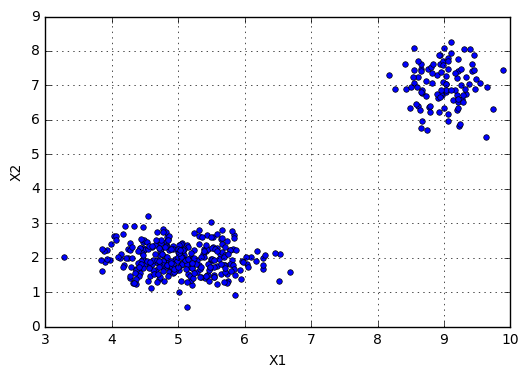

In [2]:
# We create synthetic data using two Gaussian distributions
# First, we determine the mean and standard deviation of two Gaussian distributions
mu1=np.array([5,2]); sigma1=np.array([[0.4,-0.0255],[-0.0255,0.2]])
mu2=np.array([9,7]); sigma2=np.array([[0.10,0],[0,0.4]])

# Second, we determine the number of data points on each Gaussian distribution
N1=300; N2=100

# Third, we add these properties into multivariate normal dist. function in numpy
X1=np.random.multivariate_normal(mu1, sigma1, N1)
X2=np.random.multivariate_normal(mu2, sigma2, N2)
X = np.concatenate((X1, X2), axis=0) # combine X1 and X2 as data X

# Fourth, we plot the synthetic data based on two Gaussian distribution function 
plt.plot(X[:,0],X[:,1],'bo',linewidth=2.0,markersize=4.0)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
plt.show()

# Exercise:
# Vary the parameters [mu1,mu2],[sigma1,sigma2] and [N1,N2] and see the plots

The result is the Figure showing the data which is very well separated. 
Of course, it is very easy to visualize the separation/group by human eye, but clustering aims to do this process automatically. K-means clustering is one of simple algorithm to cluster/group data sets.

<b>Simple Exercise</b>: Vary the aforementioned parameters [mu1,mu2],[sigma1,sigma2] and [N1,N2] and see the plots. You may produce two groups which are not well separated. This can be used to test on your K-means clustering.

In this tutorial, the number of clusters K is assumed to be known. There are some automatic
methods in determining K parameter, but they are not discussed here. 
We then apply <i>K-means</i> function on the data (if you are interested the detailed of the algorithm, you can take a look at <i>Kmeans.py</i>). The function returns the cluster indices as well as the cluster's
centroids. Finally, we plot the data for each cluster using different colour.

The produced Figure demonstrates how K-means algorithm successfully forms two clusters in the data.
The above problem of course is very easy to visualize because the generated data set is very well separated. The next exercise will demonstrate more challenging problem. The exercise is a good example to understand how K-means can be useful in practice.

k= 
 1
k= 
 2
mu_k (centroid) values (at the end): 
 [[ 8.9906106   7.0141474 ]
 [ 5.03464702  1.96845878]]
k= 
 1
k= 
 2
mu_k (centroid) values (at the end): 
 [[ 8.9906106   7.0141474 ]
 [ 5.03464702  1.96845878]]


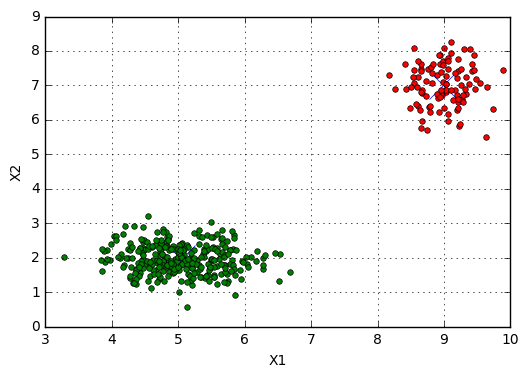

In [3]:
# In this part, we will apply K-means clustering algorithm to the above generated data

K=2 # determine the number of cluster

assignment1, mu_k = Kmeans(X,K)

k1=np.argwhere(assignment1==1) # index of cluster 1
k2=np.argwhere(assignment1==2) # index of cluster 2

plt.plot(mu_k[0,0],mu_k[0,1],'bx',mu_k[1,0],mu_k[1,1],'bx',linewidth=20.0,markersize=20.0)
plt.plot(X[k1,0],X[k1,1],'ro',X[k2,0],X[k2,1],'go',linewidth=2.0,markersize=4.0)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
plt.show()

# Exercise:
# Bring the closer the means of Gaussian distribution, what is the effect of K-means clustering
# Play around with the generated dataset and see K-means effect
# Here we use K=2, because we know we generated the data from two Gaussian distributions, what happened if you change K

# Homework:
# Understand the K-means clustering function
# Change the distance metrics, from Euclidean distance to be Manhattan distance


## Exercise 1: K-means clustering on synthetic data
### Exercise 1.a:
As instructed earlier in the simple exercise above, vary the aforementioned parameters [mu1,mu2],[sigma1,sigma2] and [N1,N2] and see the plots. You may produce two groups which are not well separated (or at least close each others). Perform K-means clustering on that data.
### Exercise 1.b:
Create synthetic 3D-data using a multivariate Gaussian distribution, select appropraiately parameters [mu1,mu2,mu3],[sigma1,sigma2,sigma3] and [N1,N2,N3] and see the plots. Perform K-means clustering on that data.

## Exercise 2: K-means clustering on chemical wine data
This exercise is a continuation of previous wine tutorial (using PCA). 
We still use wine data set, where the descriptors are shown in the table (section PCA). 

Based on the eigenvalues generated by PCA in the data, it is known that there are three most dominant PCs. 
The objective is to apply K-means on the reduced data (using the first three PCs) for clustering three different groups of wine. 
We know from the data set the actual classiffication of the wine, therefore the clusters generated through K-means
should mimics the actual wine classes. 

### Exercise 2.a:
We provide the template for this exercise.
Perform K-means on the reduced data (using only three PCs). Produce a 3D plot of the grouped wine data based on clustering and compare the results with the actual wine classes. 
### Exercise 2.b:
Perform K-means clustering without applying PCA on the data and compare the results with the exercise 2.a.

k= 
 1
k= 
 2
k= 
 3
mu_k (centroid) values (at the end): 
 [[-0.52809375 -0.43523911]
 [ 2.89306694  1.22498344]
 [-2.59842964 -0.11260518]]
k= 
 1
k= 
 2
k= 
 3
mu_k (centroid) values (at the end): 
 [[-0.00807033 -1.41361081]
 [ 2.71238416  1.1224844 ]
 [-2.50455506  0.80969589]]
k= 
 1
k= 
 2
k= 
 3
mu_k (centroid) values (at the end): 
 [[ 0.02320309 -1.68068297]
 [ 2.73001012  1.16148726]
 [-2.34070372  0.98123326]]
k= 
 1
k= 
 2
k= 
 3
mu_k (centroid) values (at the end): 
 [[ 0.040724   -1.73830489]
 [ 2.73001012  1.16148726]
 [-2.28244286  0.95724696]]
k= 
 1
k= 
 2
k= 
 3
mu_k (centroid) values (at the end): 
 [[ 0.040724   -1.73830489]
 [ 2.73001012  1.16148726]
 [-2.28244286  0.95724696]]


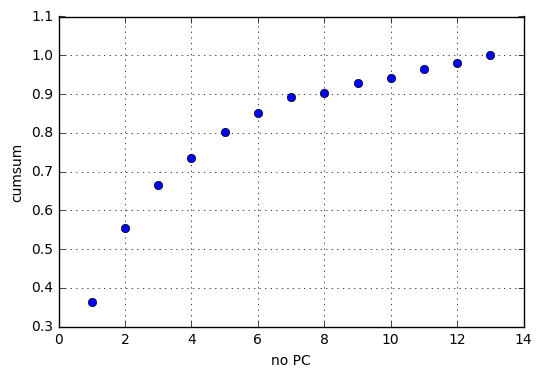

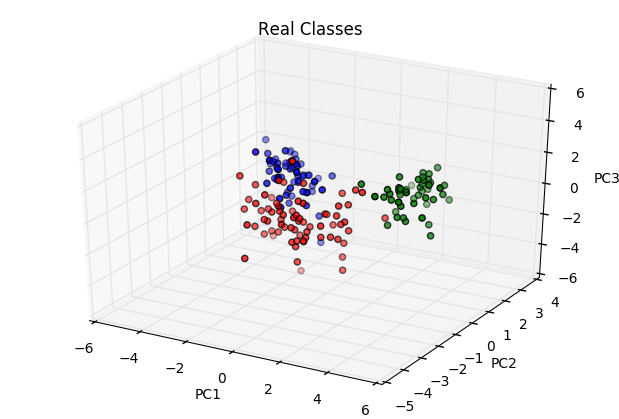

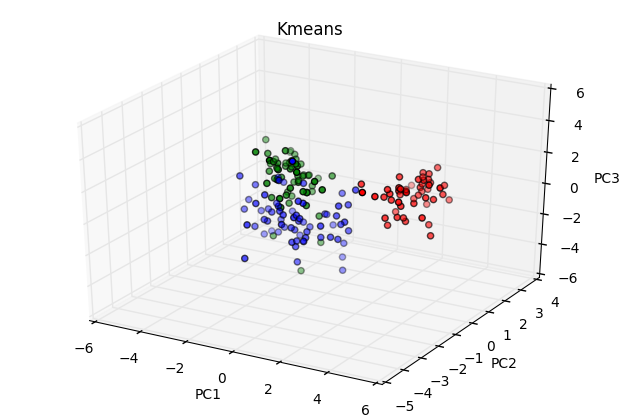

In [6]:
# We import all necessary libraries
from pyPCA import PCA
from pyKmeans import Kmeans
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pylab
import matplotlib.pyplot as plt

def zscore(X): # z-score uses to normalise the data.
    [nX,mX]=X.shape              # X has NxD
    XMean=np.mean(X,axis=0)      # take the mean of every row X
    XStd=np.std(X,axis=0,ddof=1) # take the std of every row X
    zX = X - np.kron(np.ones((nX,1)),XMean) # Z=[X - mX]
    Zscore = np.divide(zX,XStd)             # Zscore = Z/Xstd
    return Zscore

# We load the wine data again
dataIn = np.genfromtxt('./data/wineInputs.txt', delimiter=',')
dataOut = np.genfromtxt('./data/wineOutputs.txt', delimiter=',')
dataOut=np.int_(dataOut)

X=zscore(dataIn) # normalization

# Using PCA.py function, apply PCA on the normalized data:
[V, Ypca ,D] = PCA(X) # applying PCA

# determine the number of cluster
K=3 # We assume that we know the number of cluster

# Using Kmeans.py function, apply K-means clustering on the first three PCs data
assignment1, mu_k = Kmeans(Ypca[:,0:2],K) # calculate clusters and centroids
#--->>> Add Kmeans function here!

# Below is to re-show the cumulative sum of PCs
noPC=np.linspace(1,len(D),len(D))
idc=np.divide(np.cumsum(D),np.sum(D))
plt.figure(1)
plt.plot(noPC,idc,'bo') # re-plot the data
plt.xlabel('no PC')
plt.ylabel('cumsum')
plt.grid()
plt.show()

# plot the real classes here
fig1 = pylab.figure()
ax = Axes3D(fig1)
ax.scatter(Ypca[dataOut==1,0],Ypca[dataOut==1,1],Ypca[dataOut==1,2],c='b')
ax.scatter(Ypca[dataOut==2,0],Ypca[dataOut==2,1],Ypca[dataOut==2,2],c='r')
ax.scatter(Ypca[dataOut==3,0],Ypca[dataOut==3,1],Ypca[dataOut==3,2],c='g')
plt.title('Real Classes')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Plot the wine classes based on K-means clustering here
fig2 = pylab.figure()
ax = Axes3D(fig2)
ax.scatter(Ypca[assignment1==1,0],Ypca[assignment1==1,1],Ypca[assignment1==1,2],c='b')
ax.scatter(Ypca[assignment1==2,0],Ypca[assignment1==2,1],Ypca[assignment1==2,2],c='r')
ax.scatter(Ypca[assignment1==3,0],Ypca[assignment1==3,1],Ypca[assignment1==3,2],c='g')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Kmeans')

plt.show()
